In [20]:
import numpy as np
labels = ['baseline', '\u03C4=80%', '\u03C4=70%', '\u03C4=60%']

accuracy = [0.6779, 0.6779, 0.6720, 0.6596]
nmi = [0.7745, 0.7745, 0.7469, 0.7364]
kappa = [0.5842, 0.5842, 0.5783, 0.5639]
misses = [400, 400, 399, 0]

houston03 = np.vstack((accuracy, nmi, kappa))
houston03

accuracy = [0.6779, 0.6779, 0.6571, 0.6602]
nmi = [0.7745, 0.7748, 0.7336, 0.7387]
kappa = [0.5842, 0.5842, 0.5609, 0.5645]
misses = [400, 400, 399, 0]

houston05 = np.vstack((accuracy, nmi, kappa))
houston05

array([[0.6779, 0.6779, 0.6571, 0.6602],
       [0.7745, 0.7748, 0.7336, 0.7387],
       [0.5842, 0.5842, 0.5609, 0.5645]])

In [21]:
configurations = [f"{x}\n $p_i\leq$\u03C4: {y}/400" for x, y in zip(labels, misses)]
configurations        

['baseline\n $p_i\\leq$τ: 400/400',
 'τ=80%\n $p_i\\leq$τ: 400/400',
 'τ=70%\n $p_i\\leq$τ: 399/400',
 'τ=60%\n $p_i\\leq$τ: 0/400']

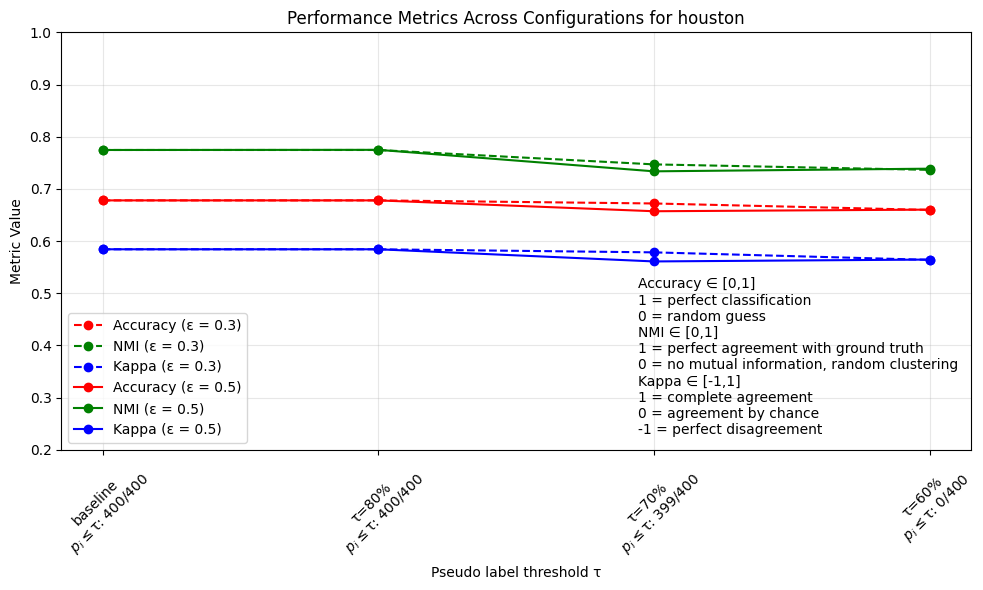

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# (1) Configuration names (x-axis categories)

# (2) Provided metric values for the first three configurations

# (3) Assume houston02 and houston05 hold the remaining data for scaling 0.2 and 0.5 respectively.
# They should be arrays of shape (3,5) so that when concatenated with the first three columns we have 8 data points.
try:
    houston03
except NameError:
    houston03 = np.random.uniform(0.5, 1.0, (3, 5))
try:
    houston05
except NameError:
    houston05 = np.random.uniform(0.5, 1.0, (3, 5))

# (4) Build full data arrays for each scaling condition (each will have shape (3,8))
# all_data_02 = np.hstack((
#     np.array(houstonSSHyperAE)[:, None],
#     np.array(houstonHyperAE)[:, None],
#     np.array(houstonSEDESC)[:, None],
#     houston02))
# all_data_05 = np.hstack((
#     np.array(houstonSSHyperAE)[:, None],
#     np.array(houstonHyperAE)[:, None],
#     np.array(houstonSEDESC)[:, None],
#     houston05))
all_data_03 = houston03
all_data_05 = houston05

# (5) Extract each metric for both scaling conditions
acc_03, nmi_03, kappa_03 = all_data_03
acc_05, nmi_05, kappa_05 = all_data_05

# (6) Create the 2D Matplotlib figure
plt.figure(figsize=(10, 6))

# For scaling 0.2 (dashed lines)
plt.plot(configurations, acc_03, marker='o', linestyle='--', color='red', label='Accuracy (\u03B5 = 0.3)')
plt.plot(configurations, nmi_03, marker='o', linestyle='--', color='green', label='NMI (\u03B5 = 0.3)')
plt.plot(configurations, kappa_03, marker='o', linestyle='--', color='blue', label='Kappa (\u03B5 = 0.3)')

# For scaling 0.5 (solid lines)
# plt.plot(configurations, acc_05, marker='o', linestyle='-', color='red', 
#          label='Accuracy (\u03B5 = 0.5) '
#         '\u2208 [0,1]\n'
#         '1 = perfect classification\n'
#         '0 = random guess')
# plt.plot(configurations, nmi_05, marker='o', linestyle='-', color='green', 
#          label='NMI (\u03B5 = 0.5) '
#         '\u2208 [0,1]\n'
#         '1 = perfect agreement with ground truth\n'
#         '0 = no mutual information, random clustering')
# plt.plot(configurations, kappa_05, marker='o', linestyle='-', color='blue', 
#          label='Kappa (\u03B5 = 0.5) '
#                '\u2208 [-1,1]\n'
#         ' 1 = complete agreement\n'
#         ' 0 = agreement by chance\n'
#         '-1 = perfect disagreement')
plt.plot(configurations, acc_05, marker='o', linestyle='-', color='red', label='Accuracy (\u03B5 = 0.5)')
plt.plot(configurations, nmi_05, marker='o', linestyle='-', color='green', label='NMI (\u03B5 = 0.5)')
plt.plot(configurations, kappa_05, marker='o', linestyle='-', color='blue', label='Kappa (\u03B5 = 0.5)')

# Customize plot
plt.title('Performance Metrics Across Configurations for houston')
plt.xlabel('Pseudo label threshold \u03C4')
plt.ylabel('Metric Value')
plt.ylim(.2, 1.0)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
legend = plt.legend(loc='best')
plt.gca().add_artist(legend)

explanation = (
    "Accuracy ∈ [0,1]\n"
    "1 = perfect classification\n"
    "0 = random guess\n"
    "NMI ∈ [0,1]\n"
    "1 = perfect agreement with ground truth\n"
    "0 = no mutual information, random clustering\n"
    "Kappa ∈ [-1,1]\n"
    "1 = complete agreement\n"
    "0 = agreement by chance\n"
    "-1 = perfect disagreement"
)

# Create a dummy handle with an empty line (invisible) that only serves to hold the explanation text
dummy_handle = mlines.Line2D([], [], linestyle='', label=explanation)

# Create the second legend with the dummy handle, positioned to the right
legend2 = plt.legend(handles=[dummy_handle], loc='lower right', frameon=False)

plt.tight_layout()
plt.show()
